In [19]:
frames_path = '/Users/alexandermittet/Library/CloudStorage/SeaDrive-almi(seafile.erda.dk)/My Libraries/BA_data/frames'
video_path = '/Users/alexandermittet/Library/CloudStorage/SeaDrive-almi(seafile.erda.dk)/My Libraries/BA_data/vid/OneDrive_7_9-4-2023'
#Prev: 
#'vid/OneDrive_6_9-4-2023'

# Extract frames from video - folder

In [1]:
import cv2
import os

# Directory containing the videos

# Directory to save the extracted frames
output_dir = frames_path
video_dir = video_path
# Create the output directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

In [2]:


# Iterate over all files in the video directory
for filename in os.listdir(video_dir):
    if filename.endswith(".mp4"): # Assuming videos are in mp4 format
        video_path = os.path.join(video_dir, filename)
        # Open the video file
        cap = cv2.VideoCapture(video_path)
        
        frame_count = 0
        while cap.isOpened():
            ret, frame = cap.read()
            if not ret:
                break
            
            # Extract every 5th frame
            if frame_count % 5 == 0:
                # Save the frame as a .jpg image
                output_path = os.path.join(output_dir, f"{filename.split('.')[0]}_frame_{frame_count}.jpg")
                cv2.imwrite(output_path, frame)
            
            frame_count += 1
        
        # Release the video capture object
        cap.release()

print("Frame extraction completed.")

Frame extraction completed.


# Calc single image sharpness

In [21]:
import cv2
import numpy as np
import random

def calculate_sharpness(image_path):
    # Load the image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Apply the Laplacian filter
    laplacian = cv2.Laplacian(image, cv2.CV_64F)
    
    # Calculate the variance of the Laplacian image
    sharpness_score = np.var(laplacian)
    
    return sharpness_score

def calculate_sharpness_of_random_frame(folder_path):
    # List all files in the directory
    files = os.listdir(folder_path)
    
    # Filter out non-image files (assuming .jpg extension)
    image_files = [f for f in files if f.endswith(".jpg")]
    
    # Select a random image file
    random_image_file = random.choice(image_files)
    
    # Construct the full path to the image file
    image_path = os.path.join(folder_path, random_image_file)
    
    # Calculate the sharpness of the selected image
    sharpness_score = calculate_sharpness(image_path)
    
    return sharpness_score, random_image_file

# Example usage
folder_path = frames_path
sharpness_score, random_image_file = calculate_sharpness_of_random_frame(folder_path)
print(f"Sharpness Score of {random_image_file}: {sharpness_score}")

Sharpness Score of gastroscope_06007_frame_120.jpg: 1420.8934919730682


## define df (prev runs)

In [7]:
import pandas as pd
scores_path = '/Users/alexandermittet/Library/CloudStorage/SeaDrive-almi(seafile.erda.dk)/My Libraries/BA_data/sharpness_scores.csv'
df = pd.read_csv(scores_path)
len(df)

19907

# Calc folder sharpness

In [8]:
import cv2
import numpy as np
import os
import csv

def calculate_sharpness(image_path):
    # Load the image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Apply the Laplacian filter
    laplacian = cv2.Laplacian(image, cv2.CV_64F)
    
    # Calculate the variance of the Laplacian image
    sharpness_score = np.var(laplacian)
    
    return sharpness_score

def calculate_sharpness_for_folder(folder_path, df):
    sharpness_scores = {}
    for filename in os.listdir(folder_path):
        if filename.endswith(".jpg") and not df['Filename'].isin([filename]).any():
            image_path = os.path.join(folder_path, filename)
            sharpness_score = calculate_sharpness(image_path)
            sharpness_scores[filename] = sharpness_score
    return sharpness_scores

def save_scores_to_csv(sharpness_scores, output_file):
    with open(output_file, 'w', newline='') as csvfile:
        fieldnames = ['Filename', 'Sharpness Score']
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

        writer.writeheader()
        for filename, score in sharpness_scores.items():
            writer.writerow({'Filename': filename, 'Sharpness Score': score})

# Example usage
folder_path = frames_path
output_file = scores_path

sharpness_scores = calculate_sharpness_for_folder(folder_path, df)
save_scores_to_csv(sharpness_scores, output_file)

print(f"Sharpness scores saved to {output_file}")

Sharpness scores saved to /Users/alexandermittet/Library/CloudStorage/SeaDrive-almi(seafile.erda.dk)/My Libraries/BA_data/sharpness_scores.csv


In [15]:
df

,Filename,Sharpness Score
0,gastroscope_06149_frame_15.jpg,1821.581831
1,gastroscope_06787_frame_10.jpg,2360.733449
2,gastroscope_06056_frame_5.jpg,467.518292
3,gastroscope_06193_frame_120.jpg,544.896860
4,gastroscope_06431_frame_20.jpg,273.243364
...,...,...
30563,gastroscope_06472_frame_115.jpg,912.069198
30564,gastroscope_06522_frame_115.jpg,699.468487
30565,gastroscope_06692_frame_30.jpg,431.215720
30566,gastroscope_06366_frame_5.jpg,265.222944


In [22]:
import os

folder_path = frames_path
num_files = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])

print(f"There are {num_files} files in the folder.")

There are 30568 files in the folder.


# Plotting frames of quartiles

FileNotFoundError: [Errno 2] No such file or directory: '/Users/alexandermittet/Library/CloudStorage/SeaDrive-almi(seafile.erda.dk)/My Libraries/BA_data/framesgastroscope_06706_frame_250.jpg'

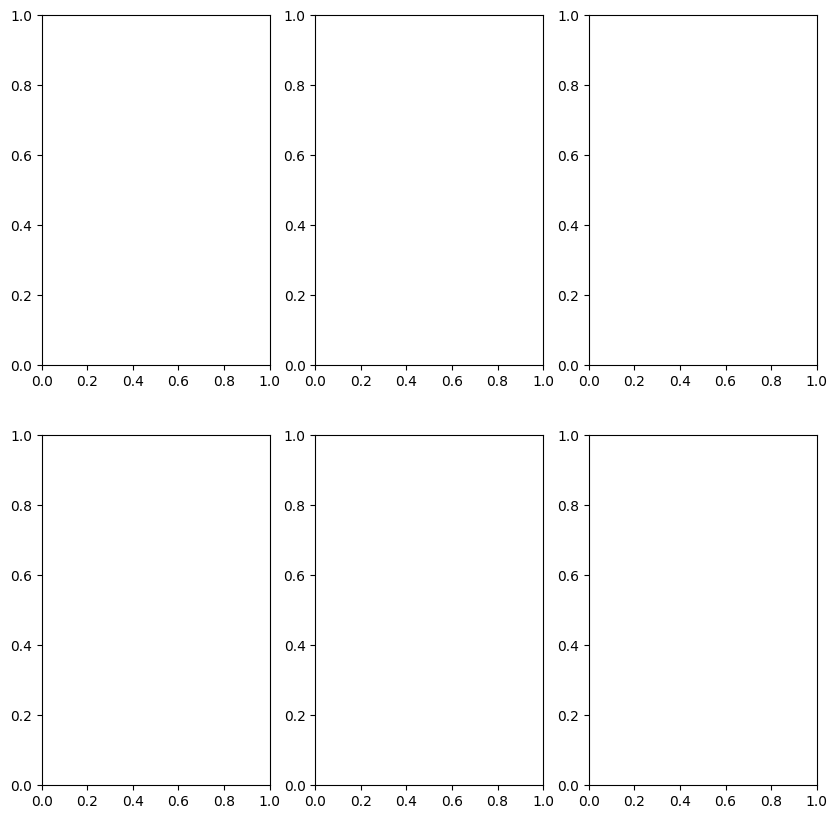

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

# Read the CSV file


# Sort the DataFrame by 'Sharpness Score'
df_sorted = df.sort_values(by='Sharpness Score')

# Define the path to the frames directory
frames_dir = frames_path

# Select frames at the 25%, 50%, 75%, and maximum sharpness scores
min_frame = frames_dir + df_sorted.iloc[0]['Filename']
q25_frame = frames_dir + df_sorted.iloc[int(len(df_sorted) * 0.25)]['Filename']
q50_frame = frames_dir + df_sorted.iloc[int(len(df_sorted) * 0.50)]['Filename']
q75_frame = frames_dir + df_sorted.iloc[int(len(df_sorted) * 0.75)]['Filename']
max_frame = frames_dir + df_sorted.iloc[-1]['Filename']

# Plot frames
fig, axes = plt.subplots(2, 3, figsize=(10, 10))

# Plot min frame
axes[0, 0].imshow(Image.open(min_frame))
axes[0, 0].set_title(f'Min: {df_sorted.iloc[0]["Sharpness Score"]}')

# Plot 25% frame
axes[0, 1].imshow(Image.open(q25_frame))
axes[0, 1].set_title(f'25%: {df_sorted.iloc[int(len(df_sorted) * 0.25)]["Sharpness Score"]}')

# Plot 50% frame
axes[1, 0].imshow(Image.open(q50_frame))
axes[1, 0].set_title(f'50%: {df_sorted.iloc[int(len(df_sorted) * 0.50)]["Sharpness Score"]}')

# Plot 75% frame
axes[1, 1].imshow(Image.open(q75_frame))
axes[1, 1].set_title(f'75%: {df_sorted.iloc[int(len(df_sorted) * 0.75)]["Sharpness Score"]}')

# Plot max frame
axes[1, 2].imshow(Image.open(max_frame))
axes[1, 2].set_title(f'Max: {df_sorted.iloc[-1]["Sharpness Score"]}')

plt.show()

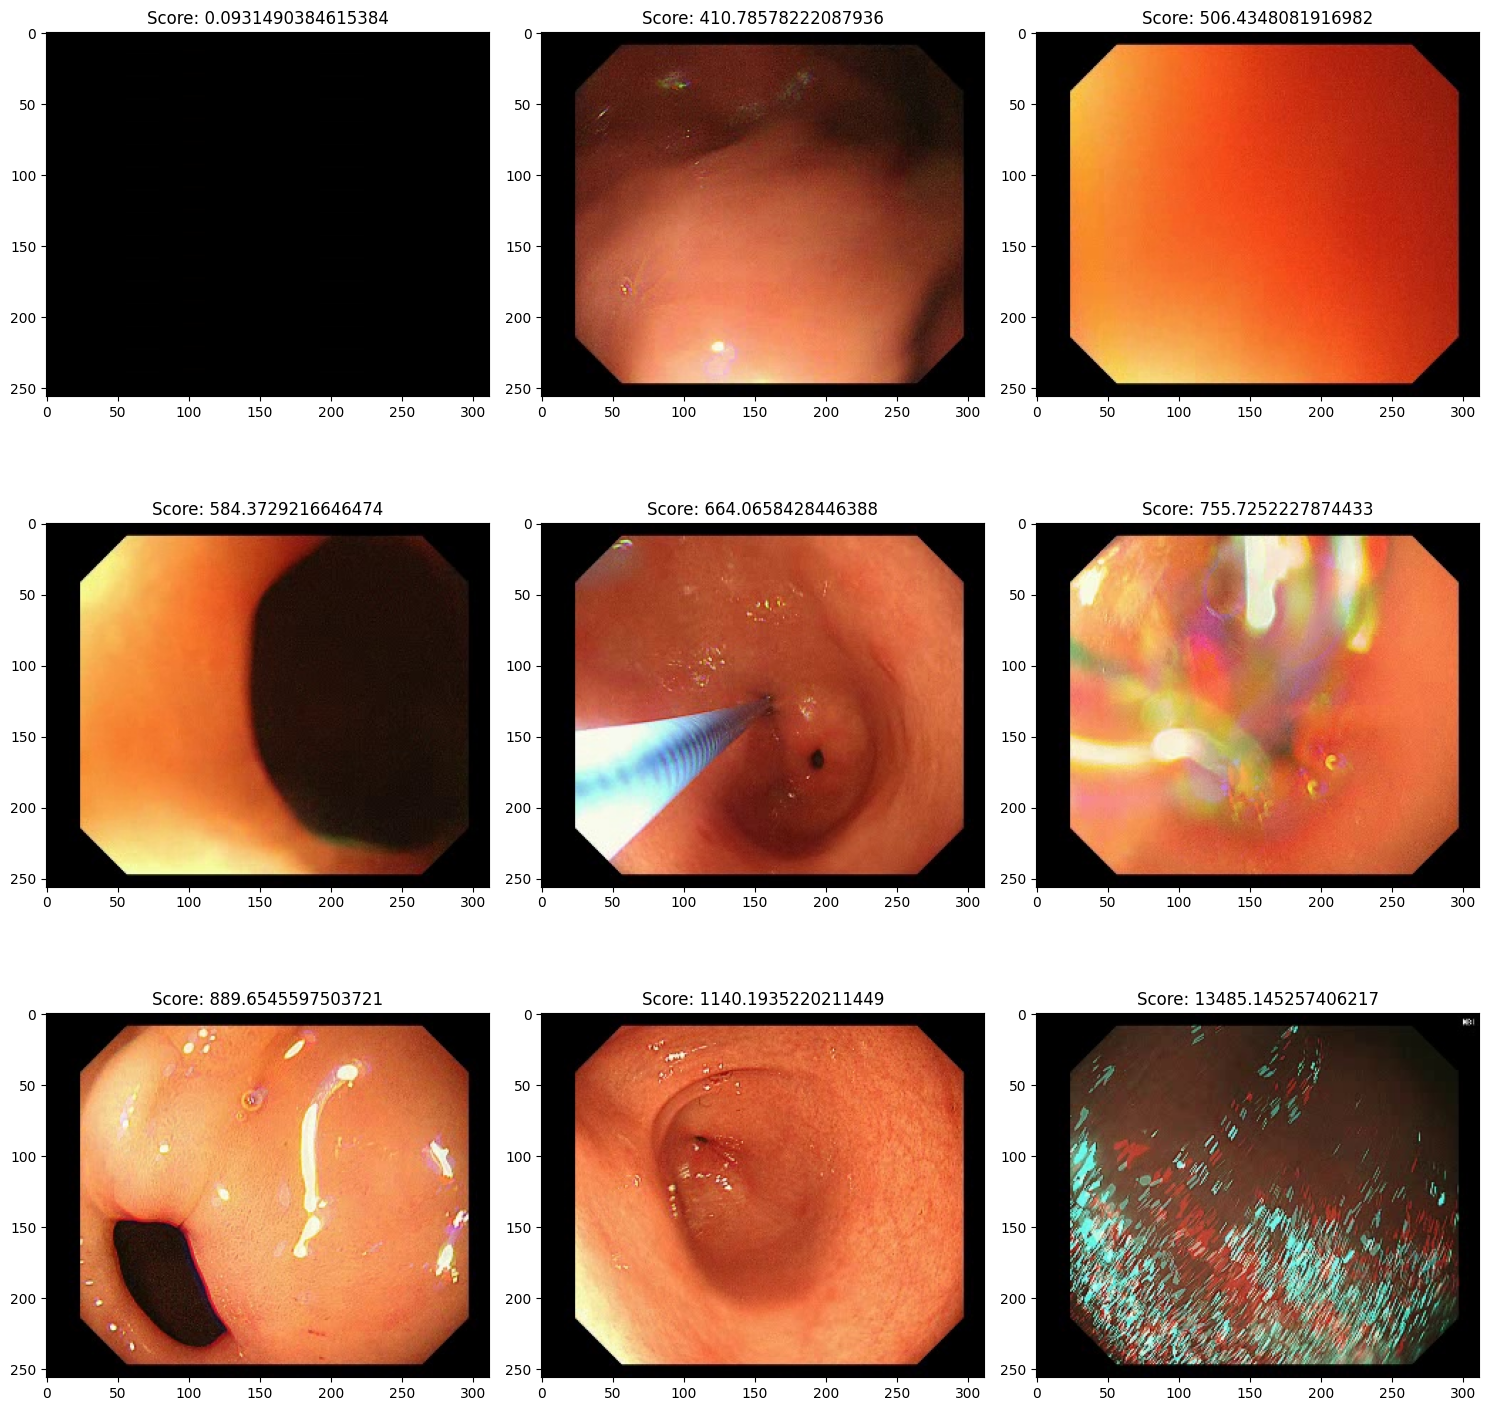

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

# Read the CSV file

# Sort the DataFrame by 'Sharpness Score'
df_sorted = df.sort_values(by='Sharpness Score')

# Define the path to the frames directory
frames_dir = frames_path + "/"

# Calculate the number of images
num_images = len(df_sorted)

# Calculate the indices for the 9 images
indices = [int(i * (num_images - 1) / 8) for i in range(9)]

# Select frames based on the calculated indices
selected_frames = [frames_dir + df_sorted.iloc[i]['Filename'] for i in indices]

# Plot frames
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

for i, frame in enumerate(selected_frames):
    row = i // 3
    col = i % 3
    axes[row, col].imshow(Image.open(frame))
    axes[row, col].set_title(f'Score: {df_sorted.iloc[indices[i]]["Sharpness Score"]}')

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv(scores_path)

In [29]:
df

,Filename,Sharpness Score
0,gastroscope_06149_frame_15.jpg,1821.581831
1,gastroscope_06787_frame_10.jpg,2360.733449
2,gastroscope_06056_frame_5.jpg,467.518292
3,gastroscope_06193_frame_120.jpg,544.896860
4,gastroscope_06431_frame_20.jpg,273.243364
...,...,...
30563,gastroscope_06472_frame_115.jpg,912.069198
30564,gastroscope_06522_frame_115.jpg,699.468487
30565,gastroscope_06692_frame_30.jpg,431.215720
30566,gastroscope_06366_frame_5.jpg,265.222944


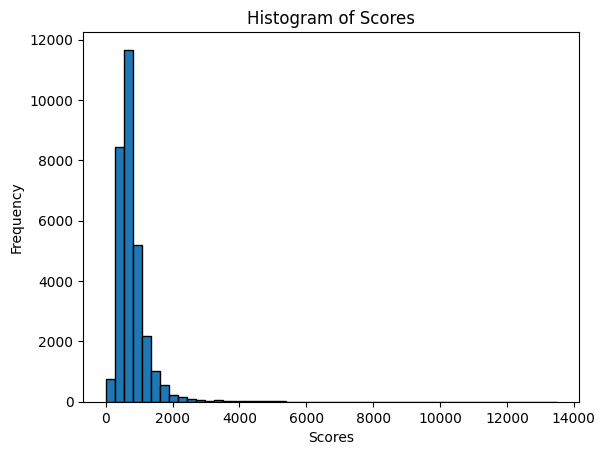

In [30]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'scores' is the column with the scores
plt.hist(df['Sharpness Score'], bins=50, edgecolor='black')
plt.xlabel('Scores')
plt.ylabel('Frequency')
plt.title('Histogram of Scores')
plt.show()